In [1]:
import pandas as pd
import os

In [2]:
path = './Sales_Data'
files_paths = [file_path for file_path in os.listdir(path)]
all_months_data = pd.DataFrame()
for file_path in files_paths:
    df = pd.read_csv(path + '/' + file_path, parse_dates=True)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [3]:
all_months_data.shape

(186850, 6)

In [4]:
all_months_data = all_months_data.dropna(how='all')
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [5]:
all_months_data = all_months_data[all_months_data['Product']!='Product']

In [6]:
all_months_data['Month Datetime'] = pd.to_datetime(all_months_data['Order Date'])

/var/folders/md/cg23_f211lbbqk8tc76zlt000000gn/T/ipykernel_18404/2710567976.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_months_data['Month Datetime'] = pd.to_datetime(all_months_data['Order Date'])


In [7]:
all_months_data['Month'] = all_months_data['Month Datetime'].dt.month

In [8]:
all_months_data['Month Name'] = all_months_data['Month Datetime'].dt.month_name()

In [9]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Datetime,Month,Month Name
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,12,December
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,12,December
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,12,December
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,12,December
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,December


In [10]:
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])

In [11]:
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])

In [12]:
all_months_data['Month'] = pd.to_numeric(all_months_data['Month'])

In [13]:
all_months_data['Sales'] = all_months_data['Quantity Ordered'] * all_months_data['Price Each']

In [14]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Datetime,Month,Month Name,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,12,December,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,12,December,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,12,December,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,12,December,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,December,11.95


In [21]:
results = all_months_data.groupby(['Month', 'Month Name'])[['Quantity Ordered', 'Sales']].sum()

In [35]:
results

,,Quantity Ordered,Sales
Month,Month Name,,
1,January,10903,1822256.73
2,February,13449,2202022.42
3,March,17005,2807100.38
4,April,20558,3390670.24
5,May,18667,3152606.75
6,June,15253,2577802.26
7,July,16072,2647775.76
8,August,13448,2244467.88
9,September,13109,2097560.13


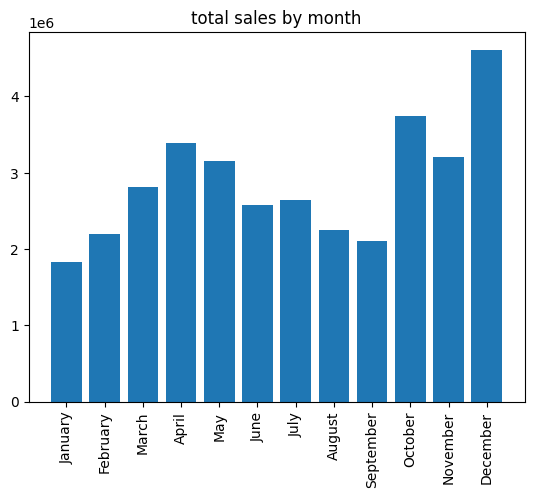

In [34]:
import matplotlib.pyplot as plt

months_names = [month[1] for month in results.index]

plt.bar(months_names, results['Sales'])
plt.title('total sales by month')
plt.xticks(months_names, rotation='vertical')
plt.show()

In [36]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Datetime,Month,Month Name,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,12,December,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,12,December,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,12,December,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,12,December,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,December,11.95


In [47]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    with_zipcode = address.split(',')[2]
    state = with_zipcode.split(' ')[1]
    return state.strip()

In [50]:
all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f'{get_city(x)} {get_state(x)}')

In [51]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Datetime,Month,Month Name,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,12,December,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,12,December,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,12,December,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,12,December,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,December,11.95,Atlanta GA


In [53]:
city_results = all_months_data.groupby(['City'])[['Sales']].sum()

In [54]:
city_results

,Sales
City,
Atlanta GA,2795498.58
Austin TX,1819581.75
Boston MA,3661642.01
Dallas TX,2767975.40
Los Angeles CA,5452570.80
New York City NY,4664317.43
Portland ME,449758.27
Portland OR,1870732.34
San Francisco CA,8262203.91


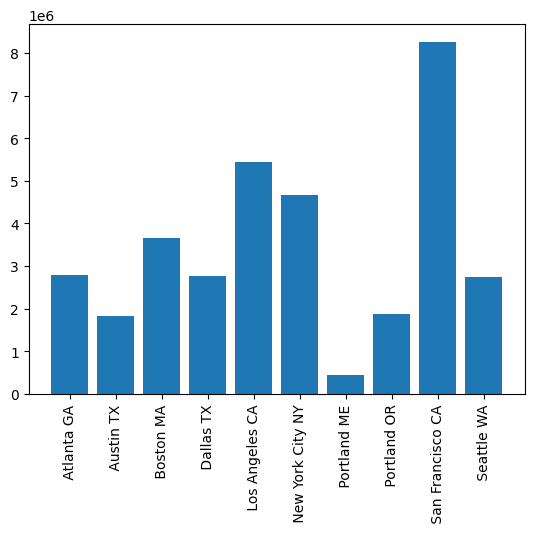

In [55]:
plt.bar(city_results.index, city_results['Sales'])
plt.xticks(city_results.index, rotation='vertical')
plt.show()

In [57]:
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])

/var/folders/md/cg23_f211lbbqk8tc76zlt000000gn/T/ipykernel_18404/1054373277.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])


In [59]:
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour

In [62]:
orders_count_by_hour = all_months_data.groupby(['Hour'])[['Hour']].count()

In [63]:
orders_count_by_hour

,Hour
Hour,
0,3910
1,2350
2,1243
3,831
4,854
5,1321
6,2482
7,4011
8,6256


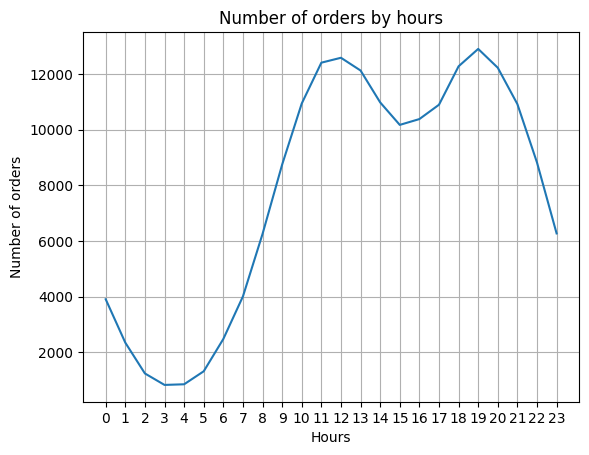

In [66]:
plt.plot(orders_count_by_hour.index, orders_count_by_hour['Hour'])
plt.xticks(orders_count_by_hour.index)
plt.xlabel('Hours')
plt.ylabel('Number of orders')
plt.title('Number of orders by hours')
plt.grid()
plt.show()

In [67]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Datetime,Month,Month Name,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,12,December,1700.00,New York City NY,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,12,December,600.00,New York City NY,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,12,December,11.95,New York City NY,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,12,December,149.99,San Francisco CA,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,December,11.95,Atlanta GA,12


In [82]:
#all_months_data.groupby(['Order ID'])[['Order ID']].count()
multiple_products_orders = all_months_data[all_months_data['Order ID'].duplicated(keep=False)]

In [83]:
multiple_products_orders

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Datetime,Month,Month Name,Sales,City,Hour
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,12,December,600.00,Boston MA,12
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,12,December,11.95,Boston MA,12
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,12,December,99.99,Boston MA,12
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",2019-12-25 12:37:00,12,December,11.99,Boston MA,12
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",2019-12-13 14:32:00,12,December,400.00,New York City NY,14
...,...,...,...,...,...,...,...,...,...,...,...,...
13592,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",2019-06-18 11:37:00,6,June,3.84,Los Angeles CA,11
13594,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",2019-06-04 12:06:00,6,June,600.00,New York City NY,12
13595,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",2019-06-04 12:06:00,6,June,11.95,New York City NY,12
13614,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",2019-06-07 22:21:00,6,June,700.00,New York City NY,22


In [87]:
multiple_products_orders['Grouped Products'] = multiple_products_orders.groupby(['Order ID'])[['Product']].transform(lambda x: ','.join(x))

/var/folders/md/cg23_f211lbbqk8tc76zlt000000gn/T/ipykernel_18404/3322557129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_products_orders['Grouped Products'] = multiple_products_orders.groupby(['Order ID'])[['Product']].transform(lambda x: ','.join(x))


In [93]:
multiple_products_orders = multiple_products_orders[['Order ID', 'Grouped Products']].drop_duplicates()

In [94]:
multiple_products_orders.head()

,Order ID,Grouped Products
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [99]:
from itertools import combinations
from collections import Counter

grouped_result = Counter()

for products in multiple_products_orders['Grouped Products']:
    product_list = products.split(',')
    grouped_result.update(combinations(product_list, 2))

for products in grouped_result.most_common(10):
    print(products)

(('iPhone', 'Lightning Charging Cable'), 1005)
(('Google Phone', 'USB-C Charging Cable'), 987)
(('iPhone', 'Wired Headphones'), 447)
(('Google Phone', 'Wired Headphones'), 414)
(('Vareebadd Phone', 'USB-C Charging Cable'), 361)
(('iPhone', 'Apple Airpods Headphones'), 360)
(('Google Phone', 'Bose SoundSport Headphones'), 220)
(('USB-C Charging Cable', 'Wired Headphones'), 160)
(('Vareebadd Phone', 'Wired Headphones'), 143)
(('Lightning Charging Cable', 'Wired Headphones'), 92)


In [103]:
products_by_quantity = all_months_data.groupby('Product')[['Quantity Ordered']].sum()

In [111]:
products_by_price = all_months_data.groupby('Product')[['Price Each']].max()

/var/folders/md/cg23_f211lbbqk8tc76zlt000000gn/T/ipykernel_18404/4263744088.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products_by_quantity.index, rotation='vertical')
/var/folders/md/cg23_f211lbbqk8tc76zlt000000gn/T/ipykernel_18404/4263744088.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


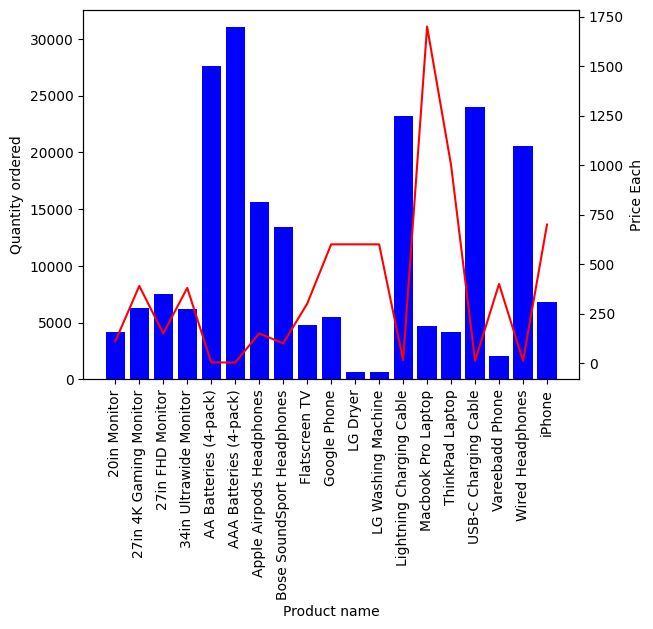

In [115]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products_by_quantity.index, products_by_quantity['Quantity Ordered'], color='b')
ax1.set_xticklabels(products_by_quantity.index, rotation='vertical')
ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity ordered')

ax2.plot(products_by_price.index, products_by_price['Price Each'], color='r')
ax2.set_ylabel('Price Each')

fig.show()

In [116]:
corelation_matrix = products_by_quantity

In [117]:
corelation_matrix['Price'] = products_by_price['Price Each']

In [118]:
corelation_matrix

,Quantity Ordered,Price
Product,,
20in Monitor,4129,109.99
27in 4K Gaming Monitor,6244,389.99
27in FHD Monitor,7550,149.99
34in Ultrawide Monitor,6199,379.99
AA Batteries (4-pack),27635,3.84
AAA Batteries (4-pack),31017,2.99
Apple Airpods Headphones,15661,150.00
Bose SoundSport Headphones,13457,99.99
Flatscreen TV,4819,300.00


In [121]:
corel = corelation_matrix.corr()
corel.style.background_gradient(cmap='coolwarm')

,Quantity Ordered,Price
Quantity Ordered,1.000000,-0.601443
Price,-0.601443,1.000000


In [125]:
corel

,Quantity Ordered,Price
Quantity Ordered,1.000000,-0.601443
Price,-0.601443,1.000000
